plot of the history prediction for the unimodal case - adapt the paths

In [1]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as plticker
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator #What do these do?
from matplotlib import cm
import seaborn as sns
import plotly.express as px
import numpy as np
import sklearn
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


In [3]:
# Plot styling
#os.environ["PATH"] += os.pathsep + '/usr/bin' # To set latex= True?

#plt.style.use('plot_style.txt')
plt.style.use('/data/user/boiger_r/aerosol/aerosol_nn_paper/postprocessing/plot_style.txt')

# Textwidth of LaTeX file. Can be determined via \the\textwidth
textwidth = 483.69687

# Decide wether we want to save all figures
save_to_file = True

# Colors
cmap = cm.get_cmap('magma')

# Ticks
loc15 = plticker.MultipleLocator(base=15.0)
loc30 = plticker.MultipleLocator(base=30.0)

In [4]:
def set_size(textwidth, fraction=1, subplots=(1, 1), scale_factor=1, rescale_height=1):
    """Set figure dimensions to avoid scaling in LaTeX.
    
    Based largely on Jack Walton's post on ploting figures with matplotlib and LaTeX:
    https://jwalton.info/Embed-Publication-Matplotlib-Latex/
    
    Input:
        textwidth: float or string
                Document width in points, or string of predined document type
        fraction: float, optional
                Fraction of the width which you wish the figure to occupy
        subplots: array-like, optional
                The number of rows and columns of subplots.
        scale_factor: Facto to scale width and height with
        rescale_height: Factor to rescale height
    Returns:
        fig_dim: tuple
                Dimensions of figure in inches
    """
    if textwidth == 'paper':
        # Textwidth of LaTeX file. Can be determined by typing
        # \the\textwidth
        # in your latex file and then compiling.
        width_pt = 483.69687
    elif textwidth == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = textwidth

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (scale_factor*fig_width_in, rescale_height*scale_factor*fig_height_in)

In [5]:
directory = '/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/'
directory1 = directory + 'paper_results_gaussian_AAE/version1'
best_model_folder = '79df1_00001' #version1
#best_model_folder = '79df1_00024'
#best_model_folder = '733b8_00013' #version4
pred_datafile = directory1 +'/model/pred.hdf5'

In [6]:
plot_dir = directory1 + '/plots/hyperparameter_scans_paper'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
result_dir = directory1
model_dir = directory1 +'/model'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [7]:

best_model_hist = pd.read_csv(f'{result_dir}/histories/{best_model_folder}.csv', index_col=0)

In [8]:
best_model_hist.columns

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'MAE_train_dvar', 'MAE_val_dvar', 'MAPE_train_dvar',
       'MAPE_val_dvar', 'MSE_train_dvar', 'MSE_val_dvar',
       'median_percentile_max_error_train_dvar',
       'median_percentile_max_error_val_dvar',
       '90_percentile_max_error_train_dvar',
       '90_percentile_max_error_val_dvar', 'r2_train_dvar', 'r2_val_dvar',
       'r2_adj_train_dvar', 'r2_adj_val_dvar', 'time_this_iter_s', 'done',
       'timesteps_total', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_total_s', 'pid', 'hostname',
       'node_ip', 'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id'],
      dtype='object')

In [9]:
color = [cmap(0.8), cmap(0.2)]
color = ['tab:blue', 'tab:red']
#scat_style = {'s': 12, 'marker': 'P', 'alpha': 0.9, 'linewidths': 0.8}

train_marker = {'markerfacecolor': color[0], 'markeredgecolor': color[0], 'color': color[0],
                'markersize': 4, 'alpha': 1}
val_marker = {'markerfacecolor': color[1], 'markeredgecolor': color[1], 'color': color[1],
               'markersize': 3, 'alpha': 1}

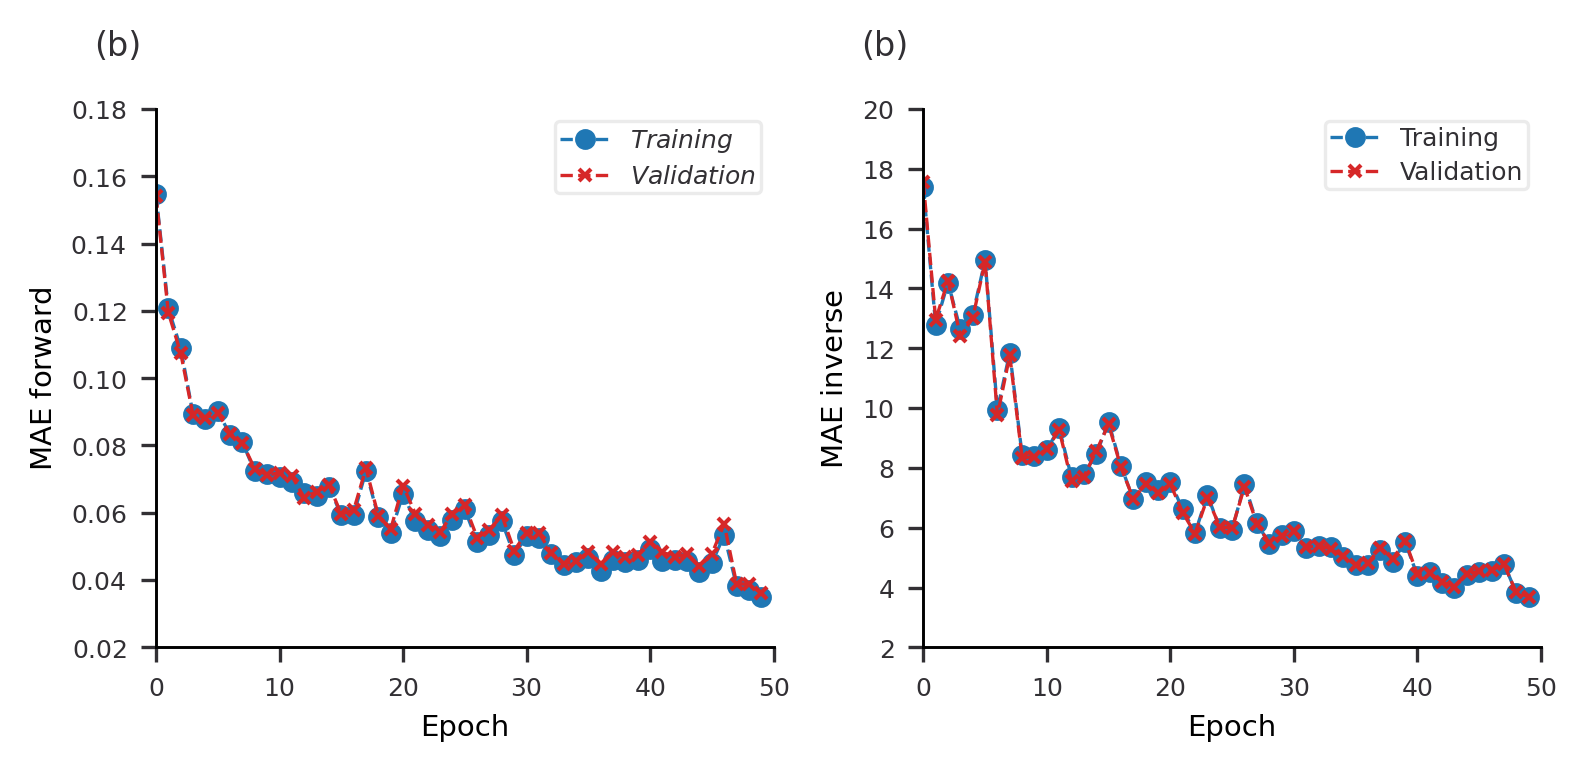

In [10]:
sizel = 8
epoch_limits = [0,50]
#fig, axs = plt.subplots(1, 2, figsize=(5.3,4))
fig = plt.figure(figsize=(5.3,2.6))
#ax = axs[0]
ax = fig.add_subplot(121)
ax.plot(best_model_hist['MAE_train'], 'o--', label = '$Training$', **train_marker)

ax.plot(best_model_hist['MAE_val'], 'x--', label =  '$Validation$', **val_marker)

#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.set_xlabel('Epoch')
ax.set_ylabel('$\operatorname{MAE}$ forward')
ax.set_xlim(epoch_limits)

#ax.xaxis.set_minor_locator(AutoMinorLocator(4))    
ax.legend( loc='upper right')
    #fig.suptitle("$\operatorname{Mean\ absolute\ errror}$")
ax.text(-0.1, 1.1,'(b)' , transform=ax.transAxes, size=sizel)
ax2 = fig.add_subplot(122)
ax2.plot(best_model_hist['MAE_train_dvar'], 'o--', label = 'Training', **train_marker)
ax2.plot(best_model_hist['MAE_val_dvar'], 'x--', label =  'Validation', **val_marker)

#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('$\operatorname{MAE}$ inverse')
ax2.set_xlim(epoch_limits)
#ax.set_title("$\operatorname{Forward\ process}$")
#ax.tick_params(labelsize = 16)
#ax.xaxis.set_minor_locator(AutoMinorLocator(4))    
ax2.legend( loc='upper right')
ax2.text(-0.1, 1.1,'(b)' , transform=ax2.transAxes, size=sizel)
fig.tight_layout()
fig.savefig(f'{plot_dir}/history_MAE_fw_inv_uni_lo_label.jpg')

In [11]:
test_datafile = '/data/user/boiger_r/aerosol/aerosol_data/raw_data_AAE/pre_log_ts-0.2_wl-450-532-630_sc-None_qoi-ScatteringData/test_dataset.hdf5'

In [12]:
dvar_test = pd.read_hdf(test_datafile,key = 'dvar')
qoi_test = pd.read_hdf(test_datafile,key = 'qoi')
dvar_test.reset_index(drop=True, inplace=True)
qoi_test.reset_index(drop=True, inplace=True)

In [13]:
qoi_columns = qoi_test.columns
dvar_columns = dvar_test.columns

In [14]:
qoi_pred_fw = pd.read_hdf(pred_datafile, 'fw')
qoi_pred_fw = pd.DataFrame(data=qoi_pred_fw, columns=qoi_columns)


In [15]:
dvar_pred_iv = pd.read_hdf(pred_datafile,'inv')
dvar_pred_iv = pd.DataFrame(data=dvar_pred_iv, columns=dvar_columns)


In [16]:
wl = ['450', '532','630']
wl_P11_450 = []
wl_P11_532 = []
wl_P11_630 = []
wl_P12_450 = []
wl_P12_532 = []
wl_P12_630 = []
for key in qoi_columns:
    if 'P11_0.450' in key:
        wl_P11_450.append(key)
    elif 'P11_0.532' in key:
        wl_P11_532.append(key)
    elif 'P11_0.630' in key:
        wl_P11_630.append(key)
    elif 'P12_0.450' in key:
        wl_P12_450.append(key)
    elif 'P12_0.532' in key:
        wl_P12_532.append(key)
    elif 'P12_0.630' in key:
        wl_P12_630.append(key)
        
      

In [17]:
wl_list_P11 = [wl_P11_450,wl_P11_532,wl_P11_630]
wl_list_P12 = [wl_P12_450, wl_P12_532, wl_P12_630]

In [18]:
color1 = ['orange','red','darkred','dodgerblue','blue','midnightblue']

In [19]:
pred_marker450 = {'marker':'.','markersize':6,'markerfacecolor': color1[0], 'markeredgecolor': color1[0], 'color': color1[0],
             'alpha': 0.9}
test_marker450 = {'linewidth':5,'color': color1[3],'alpha': 0.9}
pred_marker532 = {'marker':'.','markersize':6,'markerfacecolor': color1[1], 'markeredgecolor': color1[1], 'color': color1[1],
             'alpha': 0.9}
test_marker532 = {'linewidth':5,'color': color1[4], 'alpha': 0.9}
pred_marker630 = {'marker':'.','markersize':6,'markerfacecolor': color1[2], 'markeredgecolor': color1[2], 'color': color1[2],
             'alpha': 0.9}
test_marker630 = {'linewidth':5,'color': color1[5], 'alpha': 0.9}

In [20]:
presentation_plot_index = [0,6,8]
presentation_plot_index = [3000,4000,10000]
presentation_plot_index = [7804,13990,16732,4556,1759,4955]
presentation_plot_index = [1000,2000,3000,4000,5000,6000]

presentation_plot_index = [4000,1000,6000,3000,2000,5000]

In [21]:
dvar_pred_iv['k_450']=dvar_pred_iv['k_532']*(450/532)**(1-dvar_pred_iv['AAE'])
dvar_pred_iv['k_630']=dvar_pred_iv['k_532']*(630/532)**(1-dvar_pred_iv['AAE'])

In [22]:
dvar_test['k_450']=dvar_test['k_532']*(450/532)**(1-dvar_test['AAE'])
dvar_test['k_630']=dvar_test['k_532']*(630/532)**(1-dvar_test['AAE'])

In [23]:
x_450 = 450*np.ones(len(presentation_plot_index))
x_532 = 532*np.ones(len(presentation_plot_index))
x_630 = 630*np.ones(len(presentation_plot_index))


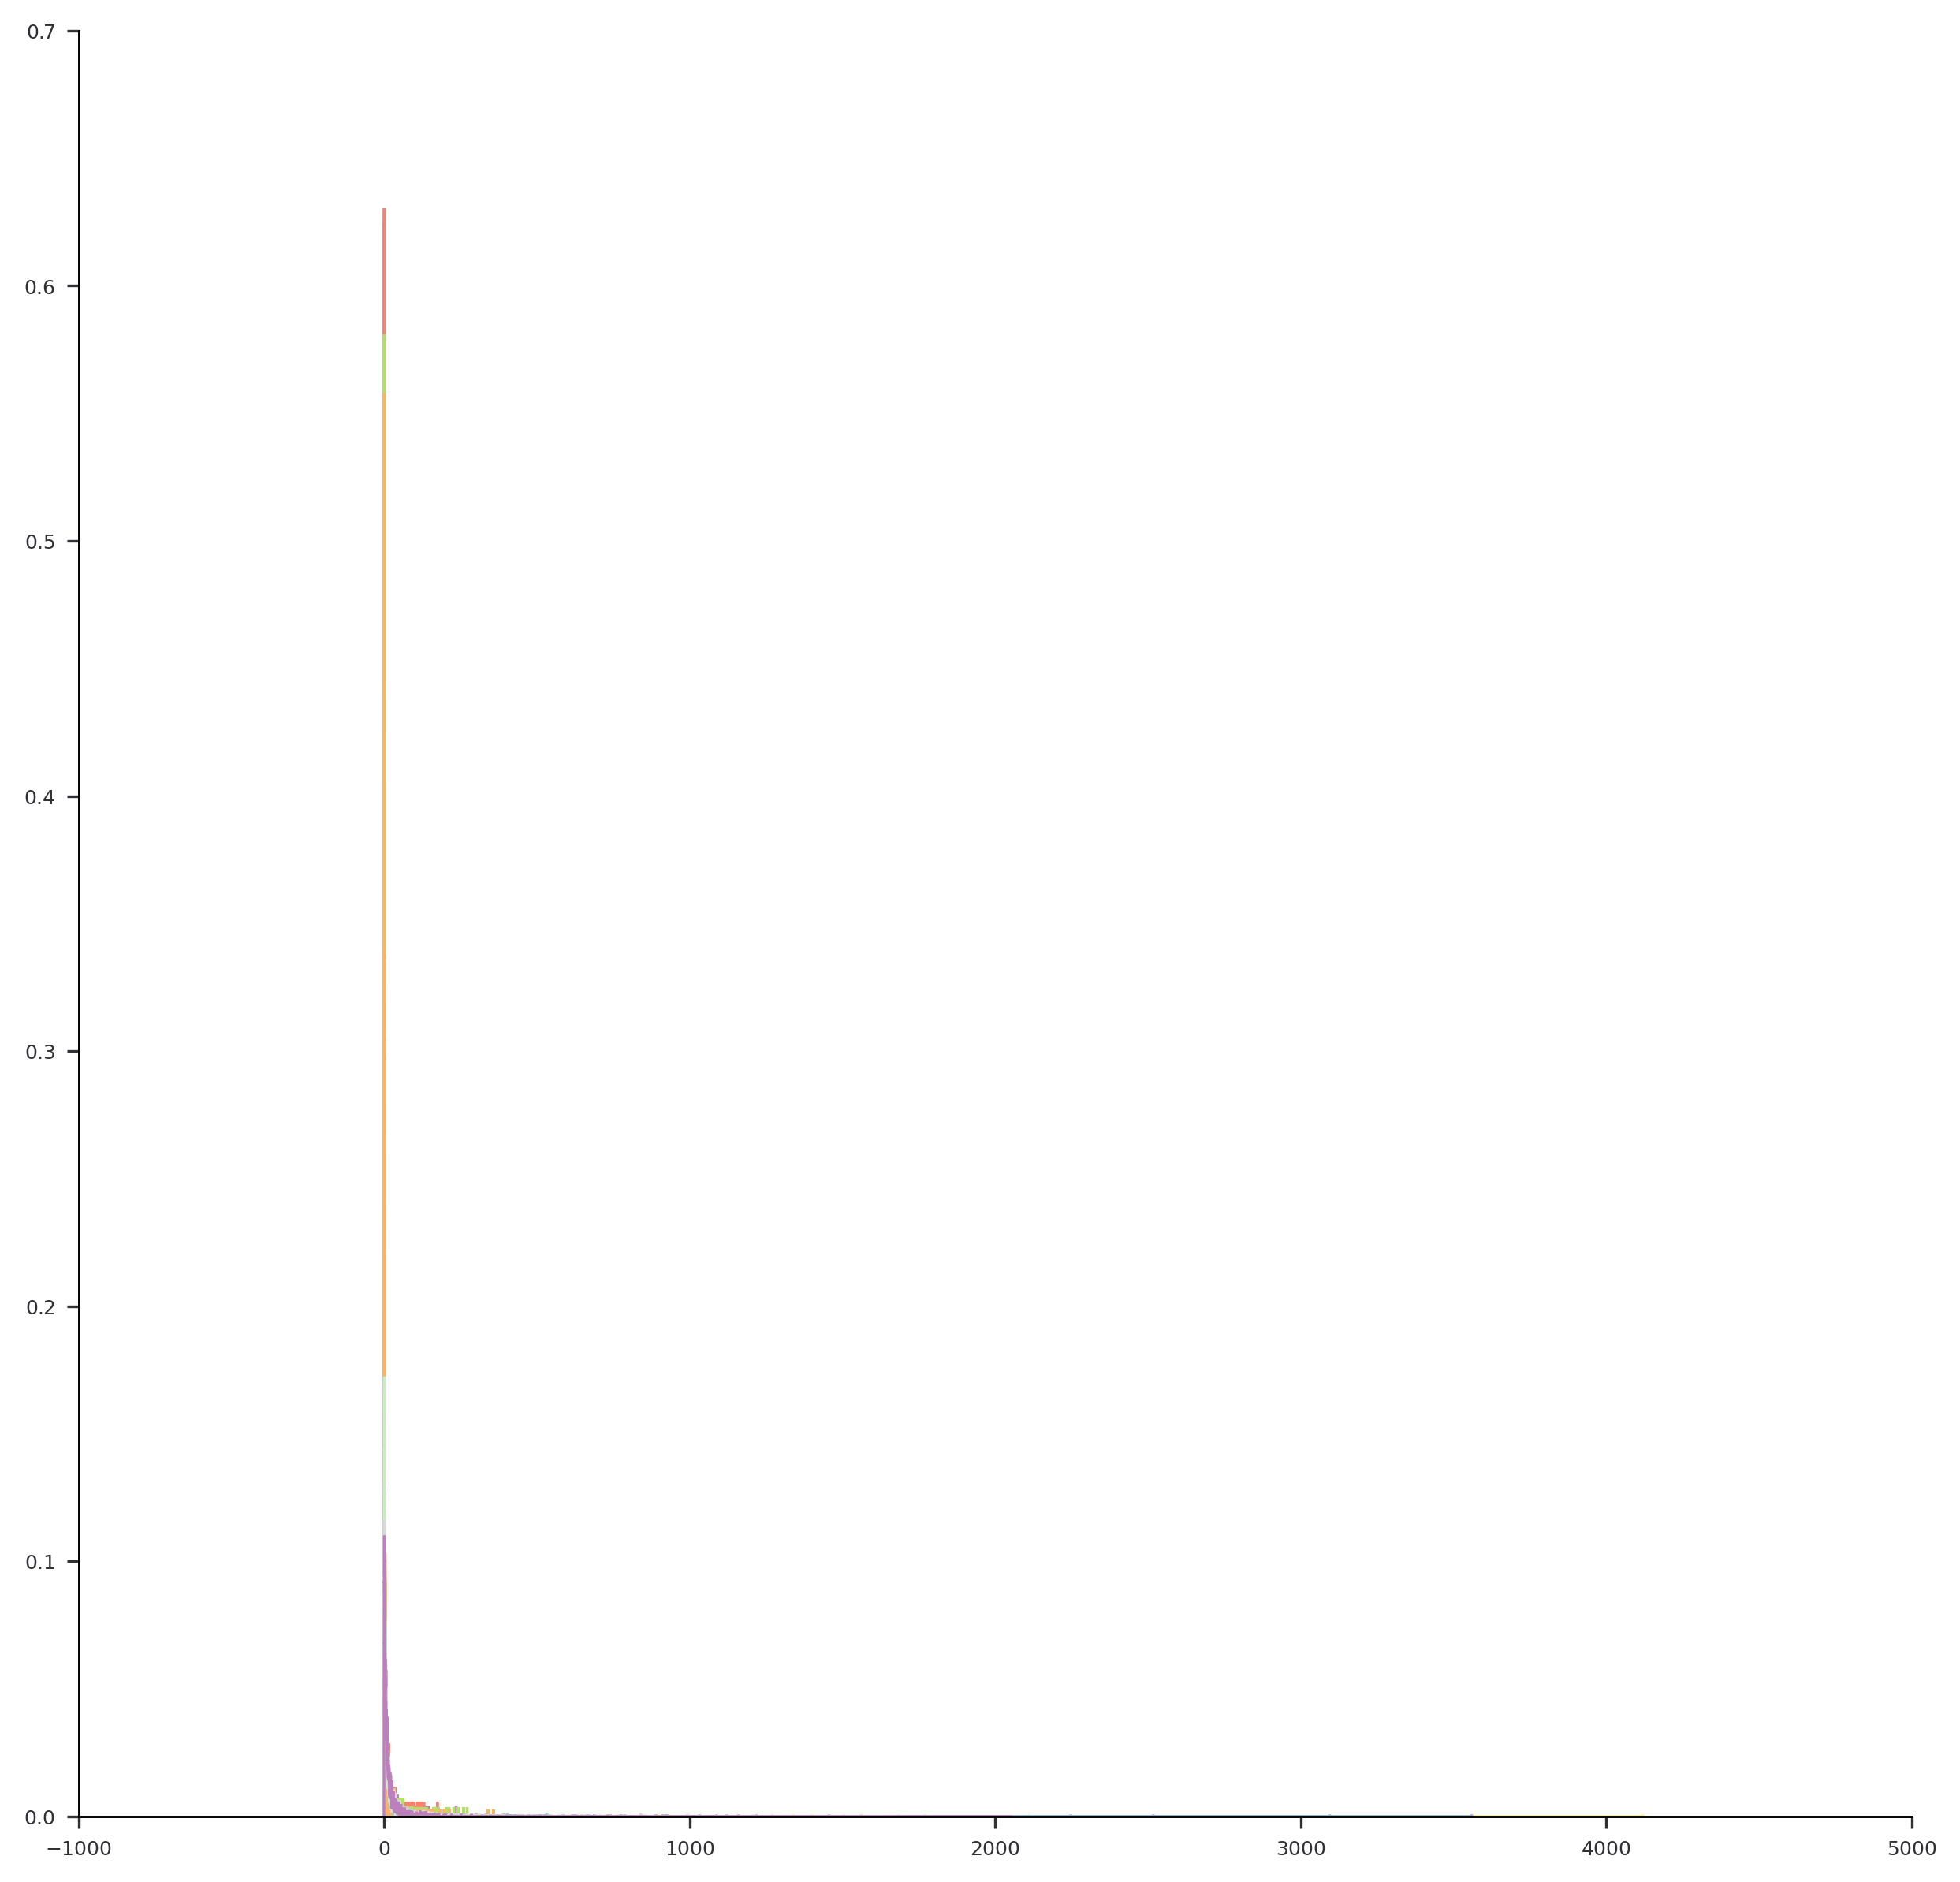

In [24]:
fig, ax = plt.subplots(figsize = (10,10))

x1data = []
x2data = []
y1data = []
y2data = []

for datapoint in presentation_plot_index:
    mu1 = dvar_pred_iv.iloc[datapoint]['R_median']
    sigma1 = dvar_pred_iv.iloc[datapoint]['GSD']
    mu2 = dvar_test.iloc[datapoint]['R_median']
    sigma2 = dvar_test.iloc[datapoint]['GSD']
    Vtot1 = dvar_pred_iv.iloc[datapoint]['V_tot']
    Vtot2 = dvar_test.iloc[datapoint]['V_tot']
    
    
    s1 = np.random.lognormal(mu1, sigma1, 10000)
    s2 = np.random.lognormal(mu2, sigma2, 10000)


    count1, bins1, ignored1 = plt.hist(s1, 10000, density=True, align='mid',histtype = 'step')
    count2, bins2, ignored2 = plt.hist(s2, 10000, density=True, align='mid',histtype = 'step')

    x1 = np.linspace(min(bins1), max(bins1), 100000)
    x2 = np.linspace(min(bins2), max(bins2), 100000)

    pdf1 = Vtot1*(np.exp(-(np.log(x1) - np.log(mu1))**2 / (2 * sigma1**2)) / (x1 * sigma1 * np.sqrt(2 * np.pi)))
    pdf2 = Vtot2*(np.exp(-(np.log(x2) - np.log(mu2))**2 / (2 * sigma2**2)) / (x2 * sigma2 * np.sqrt(2 * np.pi)))

    x1data.append(x1)
    x2data.append(x2)
    y1data.append(pdf1)
    y2data.append(pdf2)


4000
1000
6000
3000
2000
5000


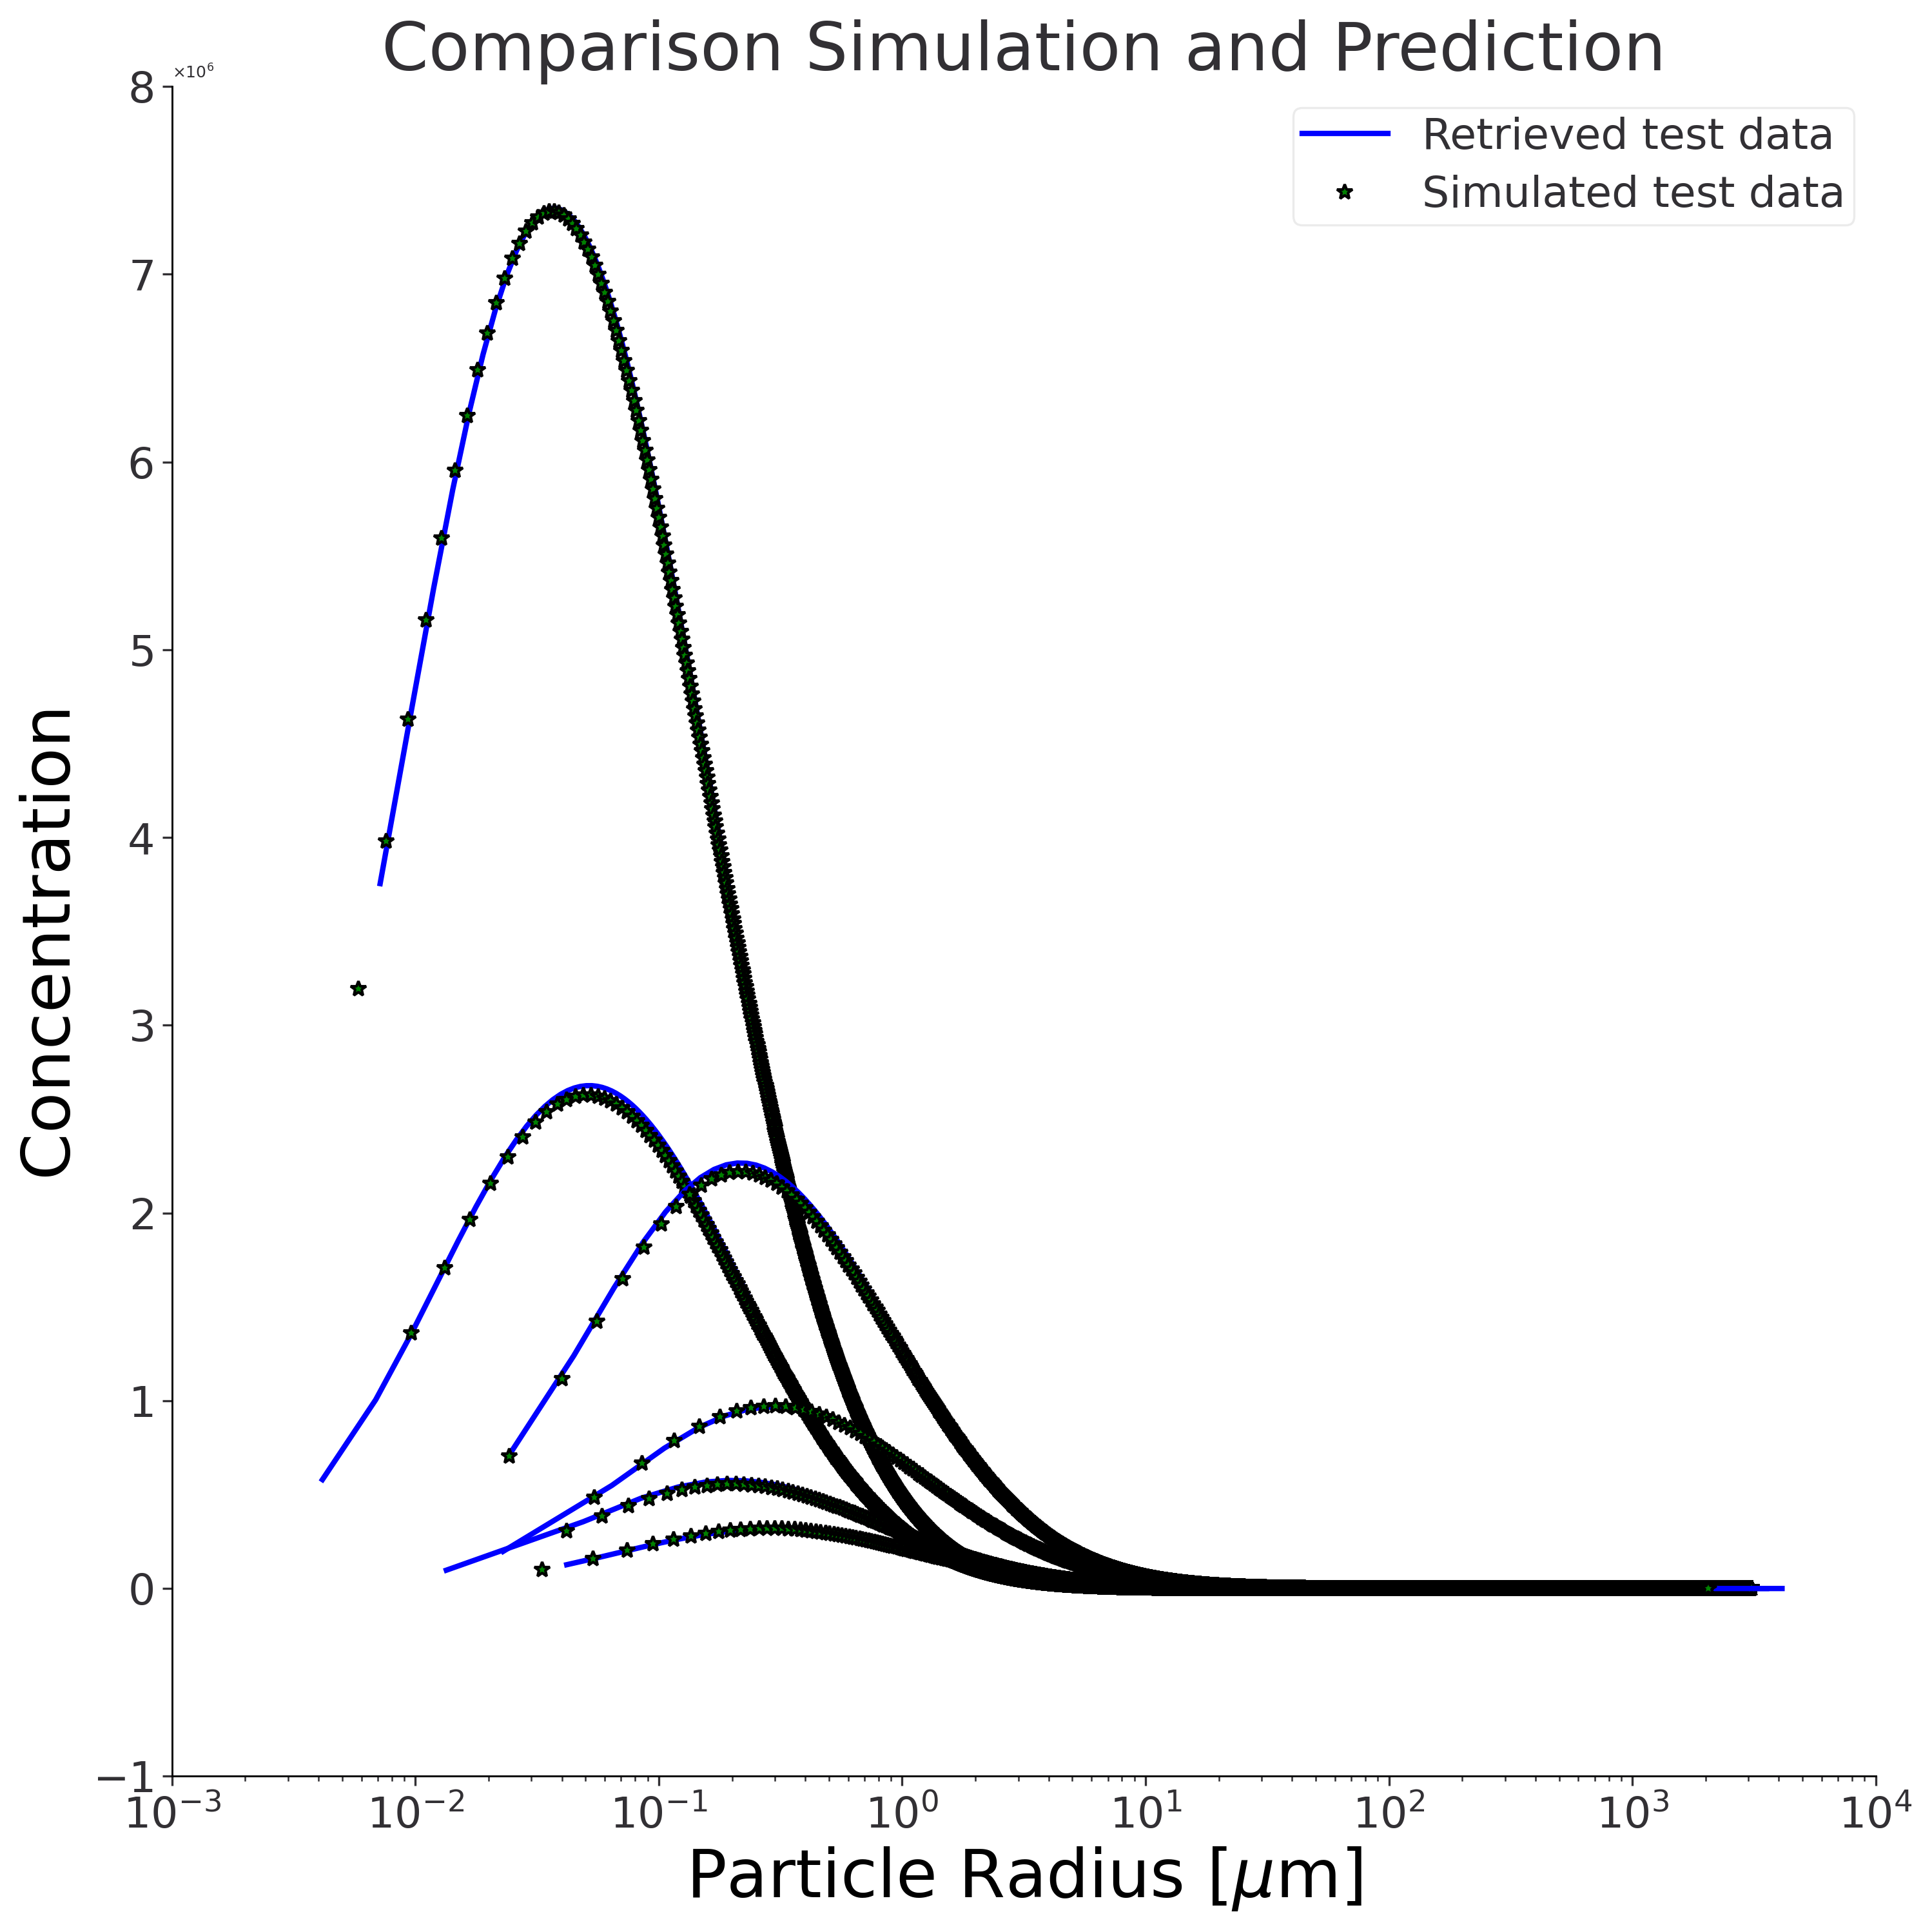

In [25]:
fig, ax = plt.subplots(figsize = (10,10))
for datalen in (0,1,2,3,4,5):
    print(presentation_plot_index[datalen])
    #fig, ax = plt.subplots(figsize = (10,10))

     
    if datalen == 0:        
        ax.plot(x1data[datalen], y1data[datalen]*1000,'b', linewidth=2,label ='Retrieved test data')
        ax.plot(x2data[datalen], y2data[datalen]*1000, '*g',linewidth=1, label = 'Simulated test data')
    else:
        ax.plot(x1data[datalen], y1data[datalen]*1000,'b', linewidth=2)#,label ='Retrieved test data')
        ax.plot(x2data[datalen], y2data[datalen]*1000, '*g',linewidth=1)#, label = 'Simulated test data')
        
    
ax.legend(['Predicted test data', 'test data'], fontsize = 16)
ax.legend(fontsize = 16)   

ax.set_xlabel('Particle Radius [$\mu$m]',fontsize = 25)
ax.set_ylabel('Concentration ',fontsize = 25)
ax.tick_params(labelsize = 16)    
ax.set_title( 'Comparison Simulation and Prediction',fontsize = 25)
fig.align_labels()

plt.xscale('log')
#plt.yscale('log')
fig.tight_layout() 
fig.savefig(f'{plot_dir}/GSD_GMR_iv.jpg')

In [26]:
color1 = ['gold','orange','orangered','red','firebrick','darkred']

color2 = ['skyblue','dodgerblue','royalblue', 'blue', 'darkblue','midnightblue']


In [27]:
fontsize1 = 20

In [28]:
presentation_plot_index

[4000, 1000, 6000, 3000, 2000, 5000]

In [29]:
color1 = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red','tab:purple', 'tab:cyan']
colorg = 'tab:gray'

In [31]:
from matplotlib.gridspec import GridSpec
import matplotlib.ticker

In [32]:
sizel=8

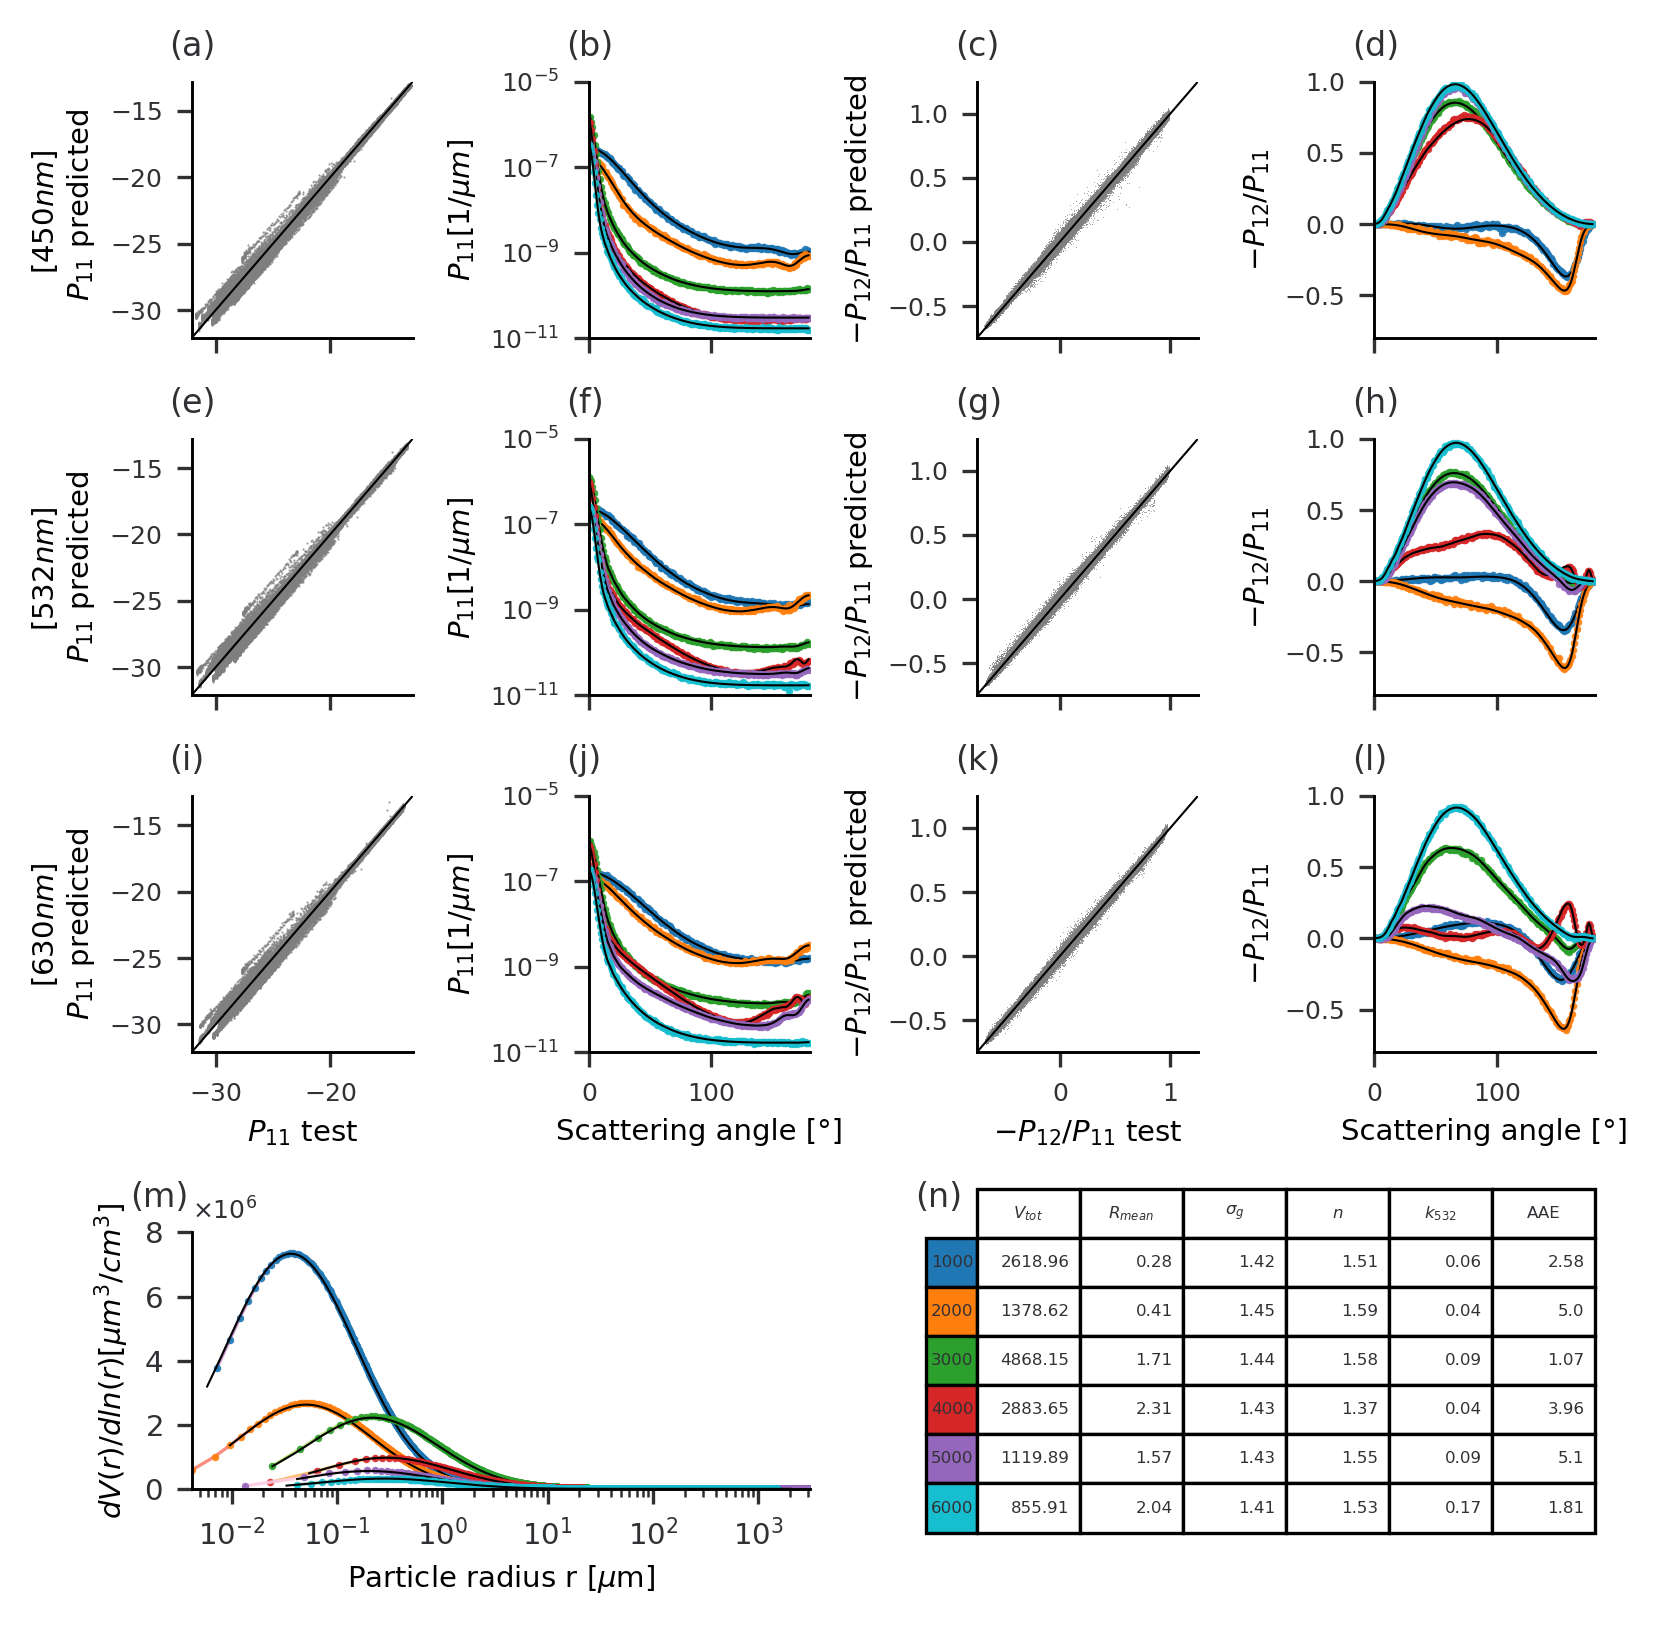

In [33]:
#fig, (ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(3, 3, figsize =(14,14))
#fig,ax = plt.subplots(3, 3, figsize =(14,14))

fig = plt.figure(figsize=(5.3,5.3),constrained_layout=True)


gs = GridSpec(4, 4, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax1.text(-0.1, 1.1,'(a)' , transform=ax1.transAxes, size=sizel)
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[1, 0],sharex=ax1)
ax6 = fig.add_subplot(gs[1, 1],sharex=ax2)
ax7 = fig.add_subplot(gs[1, 2],sharex=ax3)
ax8 = fig.add_subplot(gs[1, 3],sharex=ax4)
ax9 = fig.add_subplot(gs[2, 0],sharex=ax1)
ax10 = fig.add_subplot(gs[2, 1],sharex=ax2)
ax11 = fig.add_subplot(gs[2, 2],sharex=ax3)
ax12 = fig.add_subplot(gs[2, 3],sharex=ax4)
ax13 = fig.add_subplot(gs[3,0:2])
ax14 = fig.add_subplot(gs[3,2:4])

ax2.text(-0.1, 1.1,'(b)' , transform=ax2.transAxes, size=sizel)
ax3.text(-0.1, 1.1,'(c)' , transform=ax3.transAxes, size=sizel)
ax4.text(-0.1, 1.1,'(d)' , transform=ax4.transAxes, size=sizel)
ax5.text(-0.1, 1.1,'(e)' , transform=ax5.transAxes, size=sizel)
ax6.text(-0.1, 1.1,'(f)' , transform=ax6.transAxes, size=sizel)
ax7.text(-0.1, 1.1,'(g)' , transform=ax7.transAxes, size=sizel)
ax8.text(-0.1, 1.1,'(h)' , transform=ax8.transAxes, size=sizel)
ax9.text(-0.1, 1.1,'(i)' , transform=ax9.transAxes, size=sizel)
ax10.text(-0.1, 1.1,'(j)' , transform=ax10.transAxes, size=sizel)
ax11.text(-0.1, 1.1,'(k)' , transform=ax11.transAxes, size=sizel)
ax12.text(-0.1, 1.1,'(l)' , transform=ax12.transAxes, size=sizel)
ax13.text(-0.1, 1.1,'(m)' , transform=ax13.transAxes, size=sizel)
ax14.text(-0.1, 1.1,'(n)' , transform=ax14.transAxes, size=sizel)



i = 0
for index in presentation_plot_index:
    
    test_marker532 = {'linewidth':0.5,'color': 'black'}
    pred_marker532 = {'marker':'o','linestyle':None,'markersize':0.8,'markerfacecolor':color1[i], 'markeredgecolor': color1[i],
             'alpha': 0.9}
    
    
    ax2.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_450])).iloc[index],**pred_marker532)
    ax2.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[index])),(np.exp(qoi_test[wl_P11_450])).iloc[index],**test_marker532)

    
    
    ax6.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_532])).iloc[index],**pred_marker532)
    ax6.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[index])),(np.exp(qoi_test[wl_P11_532])).iloc[index],**test_marker532)

    ax10.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_630])).iloc[index],**pred_marker532)
    ax10.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[index])),(np.exp(qoi_test[wl_P11_630])).iloc[index],**test_marker532)

    ax4.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[index])),((qoi_pred_fw[wl_P12_450])).iloc[index],**pred_marker532)
    ax4.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[index])),((qoi_test[wl_P12_450])).iloc[index],**test_marker532)
      
    
    ax8.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[index])),((qoi_pred_fw[wl_P12_532])).iloc[index],**pred_marker532)
    ax8.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[index])),((qoi_test[wl_P12_532])).iloc[index],**test_marker532)

    ax12.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[index])),((qoi_pred_fw[wl_P12_630])).iloc[index],**pred_marker532)
    ax12.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[index])),((qoi_test[wl_P12_630])).iloc[index],**test_marker532)


    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax6.get_xticklabels(), visible=False)
    plt.setp(ax4.get_xticklabels(), visible=False)
    plt.setp(ax8.get_xticklabels(), visible=False)
    i = i+1

ax2.set_ylabel('$P_{11} [1 / \mu m]$')
ax2.set_yscale('log')
ax2.set_xlim(0, 180)
ax6.set_yscale('log')
ax6.set_ylabel('$P_{11} [1 / \mu m]$ ')
ax6.set_xlim(0, 180)
ax10.set_yscale('log')
ax10.set_xlabel('Scattering angle [°]')
ax10.set_ylabel('$P_{11} [1 / \mu m]$')
ax10.set_xlim(0, 180)
ax4.set_xlim(0, 180)
ax4.set_ylabel('$-P_{12}/P_{11}$')
ax8.set_ylabel('$-P_{12}/P_{11}$ ')
ax8.set_xlim(0, 180)
ax12.set_xlabel('Scattering angle [°]')
ax12.set_ylabel('$-P_{12}/P_{11}$')
ax12.set_xlim(0, 180)    


ax1.plot(qoi_test[wl_P11_450],qoi_pred_fw[wl_P11_450],'o', markersize = 0.5,markerfacecolor = colorg,markeredgecolor= None,markeredgewidth=0,alpha  =0.8)

ax5.plot(qoi_test[wl_P11_532],qoi_pred_fw[wl_P11_532],'o',markersize = 0.5,markerfacecolor = colorg,markeredgecolor= None,markeredgewidth=0,alpha = 0.8)
ax9.plot(qoi_test[wl_P11_630],qoi_pred_fw[wl_P11_630],'o',markersize = 0.5,markerfacecolor = colorg,markeredgecolor= None,markeredgewidth=0,alpha = 0.8)

ax1.axline([-20, -20], [-10, -10],color = 'black', linewidth = 0.5)
ax1.set_xlim(-32.1,-12.8)
ax1.set_ylim(-32.1,-12.8)
ax5.axline([-20, -20], [-10, -10],color = 'black', linewidth = 0.5)
ax5.set_xlim(-32.1,-12.8)
ax5.set_ylim(-32.1,-12.8)
ax9.axline([-20, -20], [-10, -10],color = 'black', linewidth = 0.5)
ax9.set_xlim(-32.1,-12.8)
ax9.set_ylim(-32.1,-12.8)

ax3.plot(qoi_test[wl_P12_450],qoi_pred_fw[wl_P12_450],".",markerfacecolor=colorg,markeredgecolor=None,markersize = 0.5,markeredgewidth=0,alpha = 0.8)
ax7.plot(qoi_test[wl_P12_532],qoi_pred_fw[wl_P12_532],".",markerfacecolor=colorg,markeredgecolor= None,markersize = 0.5,markeredgewidth=0,alpha = 0.8)
ax11.plot(qoi_test[wl_P12_630],qoi_pred_fw[wl_P12_630],".",markerfacecolor=colorg,markeredgecolor=None,markersize =0.5,markeredgewidth=0,alpha = 0.8)

ax3.axline([-0.5, -0.5], [0.5, 0.5],color = 'black', linewidth = 0.5)
ax3.set_xlim(-0.75,1.25)
ax3.set_ylim(-0.75,1.25)
ax7.axline([-0.5, -0.5], [0.5, 0.5],color = 'black', linewidth = 0.5)
ax7.set_xlim(-0.75,1.25)
ax7.set_ylim(-0.75,1.25)
ax11.axline([-0.5, -0.5], [0.5, 0.5],color = 'black', linewidth = 0.5)
ax11.set_xlim(-0.75,1.25)
ax11.set_ylim(-0.75,1.25)

ax1.set_ylabel('$[450 nm]$' ' \n' ' $P_{11}$ predicted')
ax3.set_ylabel('$-P_{12}/P_{11}$ predicted')
ax5.set_ylabel('$[532 nm]$' ' \n' '$P_{11}$ predicted')
ax7.set_ylabel('$-P_{12}/P_{11}$ predicted')

ax9.set_ylabel('$[630 nm]$' '\n' '$P_{11}$ predicted')
ax11.set_ylabel('$-P_{12}/P_{11}$ predicted')
ax9.set_xlabel('$P_{11}$ test')
ax11.set_xlabel('$-P_{12}/P_{11}$ test')


ax2.set_ylim(bottom = 10**(-11))
ax6.set_ylim(bottom = 10**(-11))
ax10.set_ylim(bottom = 10**(-11))

ax4.set_ylim(-0.8,1)
ax8.set_ylim(-0.8,1)
ax12.set_ylim(-0.8,1)



plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax5.get_xticklabels(), visible=False)
plt.setp(ax7.get_xticklabels(), visible=False)


i=0
for datalen in (0,1,2,3,4,5):
    test_marker532 = {'linewidth':0.5,'color': 'black'}
    pred_marker532 = {'marker':'o','linestyle':None,'markersize':0.8,'markerfacecolor':color1[i], 'markeredgecolor': color1[i],
             'alpha': 0.9}
    
    
    ax13.plot(x1data[datalen], y1data[datalen]*1000,**pred_marker532)
    ax13.plot(x2data[datalen], y2data[datalen]*1000,**test_marker532)

    i=i+1
    ax13.set_xscale('log')
    ax13.set_xlabel('Particle radius r [$\mu$m]',fontsize = 7)
    ax13.set_ylabel('$dV(r)/d ln(r) [\mu m^3/cm^3] $' ,fontsize = 7)
    ax13.tick_params(labelsize = 7)    
    #ax13.xaxis.set_minor_locator(AutoMinorLocator())
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    ax13.xaxis.set_minor_locator(x_minor)
    ax13.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

    ax13.set_ylim(bottom=0)
    ax13.set_xlim(left = np.min(x1data), right = np.max(x2data))
    
    
df_new = dvar_test.iloc[presentation_plot_index].round(2)
df_new_table = pd.DataFrame()
df_new_table['V_tot'] = df_new['V_tot']
df_new_table['R_median']=df_new['R_median']
df_new_table['GSD']=df_new['GSD']
df_new_table['n']=df_new['n']
df_new_table['k_532']=df_new['k_532']
df_new_table['AAE']=df_new['AAE']
df_new_table
df_new_columns = ["$V_{tot}$","$R_{mean}$","$\sigma_g$","$n$","$k_{532}$","AAE"]
df_new_index = ['1000','2000','3000','4000','5000','6000']
ax14.axis('tight')
ax14.axis('off')
ax14.table(cellText=df_new_table.values,colLabels=df_new_columns,rowLabels=df_new_index,loc="center",rowColours =color1,fontsize=20)





#fig.tight_layout() 
fig.savefig(f'{plot_dir}/Test_Pred_V_labels.jpg',bbox_inches='tight')








In [34]:
plot_dir

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_AAE/version1/plots/hyperparameter_scans_paper'

In [35]:
df_new

V_tot  R_median   GSD     n  k_532   AAE  k_450  k_630
4000  2618.96      0.28  1.42  1.51   0.06  2.58   0.08   0.05
1000  1378.62      0.41  1.45  1.59   0.04  5.00   0.09   0.02
6000  4868.15      1.71  1.44  1.58   0.09  1.07   0.09   0.09
3000  2883.65      2.31  1.43  1.37   0.04  3.96   0.06   0.02
2000  1119.89      1.57  1.43  1.55   0.09  5.10   0.19   0.05
5000   855.91      2.04  1.41  1.53   0.17  1.81   0.20   0.15